
<a href="https://colab.research.google.com/github/ICBI/AIMAHEAD_GU/blob/main/Courses/ML_Concepts/Module_06_Natural_Language_Processing/word_embeddings_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/ICBI/AIMAHEAD_GU_publicCourseData/main/AAlogo1.jpg" alt="Powered by" width="150"/>

#AI/ML for Healthcare Applications : Word Embeddings using Word2vec

Based on material from the Georgetown [Health Informatics and Data Science](https://healthinformatics.georgetown.edu) program and licensed under  [CC4.0](https://creativecommons.org/licenses/by/4.0/)



In [ ]:
# Load required libraries
library(dplyr)
library(ggplot2)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In this workshop, we will explore how to represent textual data for Machine Learning. In this first part we will explore the **Word embeddings** representation of enconding text to vectors

We specifically explore how to load, train word embeddings using the word2vec algorithm using a popular package called **Gensim**
More details about gensim can be found here: https://radimrehurek.com/gensim/models/word2vec.html

NOTE this next block of code will require your interaction to allow access to your google account to use colab credentials for one step.   

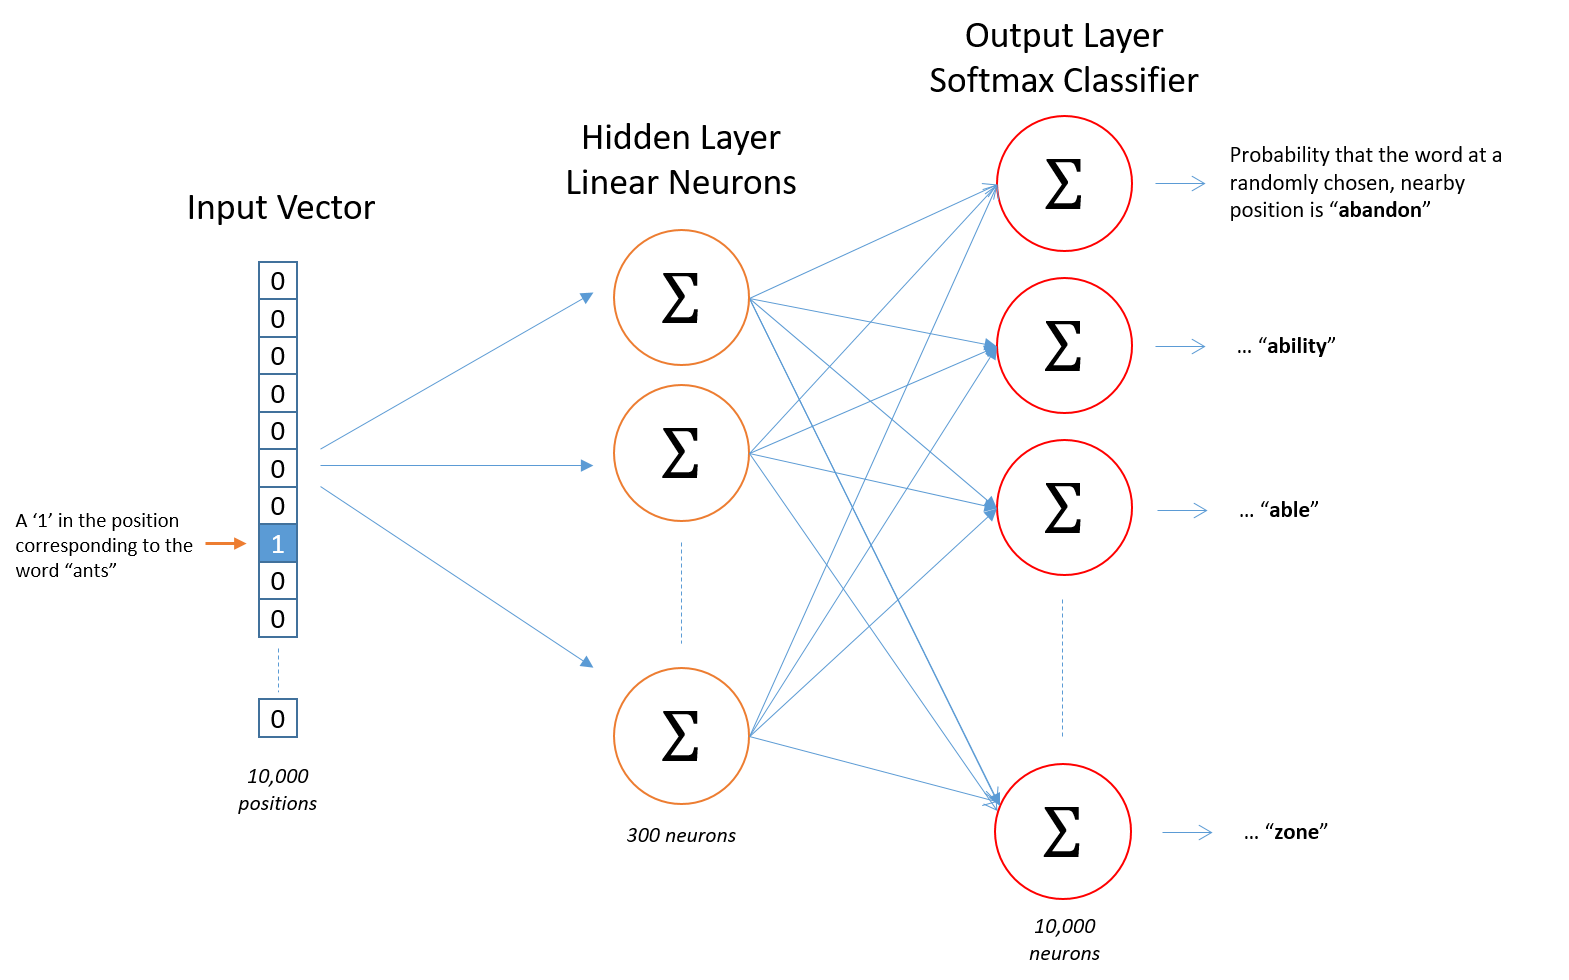

**Brief explanation**

The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model. For instance: "dog", "puppy" and "pup" are often used in similar situations, with similar surrounding words like "good", "fluffy" or "cute", and according to Word2Vec they will therefore share a similar vector representation.

From this assumption, Word2Vec can be used to find out the relations between words in a dataset, compute the similarity between them, or use the vector representation of those words as input for other applications such as text classification or clustering.The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model. For instance: "dog", "puppy" and "pup" are often used in similar situations, with similar surrounding words like "good", "fluffy" or "cute", and according to Word2Vec they will therefore share a similar vector representation.

From this assumption, Word2Vec can be used to find out the relations between words in a dataset, compute the similarity between them, or use the vector representation of those words as input for other applications such as text classification or clustering.

### Training word embeddings using Gensim

We will train word vectors/embeddings on our ADR corpus

Load dataset

In [ ]:
# Set the directory path
data_dir <- "https://raw.githubusercontent.com/ICBI/AIMAHEAD_GU_publicCourseData/main/ML_Concepts/ade_corpus_all.csv"

# Read the CSV file
ade_df <- read.csv(file.path(data_dir))

In [ ]:
dim(ade_df)

[1] 20960     3

In [ ]:
head(ade_df)

,pmid,sentence,label
,<int>,<chr>,<int>
1,10030778,Intravenous azithromycin-induced ototoxicity.,1
2,10048291,"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihydrotachysterol by rifampicin, could have led to increased calcium-release into the circulation.",1
3,10048291,Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachysterol.,1
4,10082597,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1
5,10082597,"Naproxen, the most common offender, has been associated with a dimorphic clinical pattern: a PCT-like presentation and one simulating erythropoietic protoporphyria in the pediatric population.",1
6,10082597,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1


Training using a toy example:

In [ ]:
library(data.table)
# Install required packages if not already installed
install.packages("text2vec")
library(text2vec)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘MatrixExtra’, ‘float’, ‘RhpcBLASctl’, ‘RcppArmadillo’, ‘rsparse’, ‘mlapi’, ‘lgr’




In [ ]:
install.packages("word2vec")
library(word2vec)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppProgress’




Sentences should be tokenized for training

In [ ]:
# Define the sentences
sentences <- list(
  c("this", "is", "the", "first", "sentence", "for", "word2vec"),
  c("this", "is", "the", "second", "sentence"),
  c("yet", "another", "sentence"),
  c("one", "more", "sentence"),
  c("and", "the", "final", "sentence")
)



In [ ]:
model1 <- word2vec(x = sentences, min_count = 1, iter = 100)

In [ ]:

# Flatten the list of sentences into a single character vector
corpus <- sapply(sentences, paste, collapse = " ")

# Create an iterator over tokens
tokens <- itoken(corpus, preprocessor = tolower, tokenizer = word_tokenizer, progressbar = FALSE)

# Create a vocabulary
vocab <- create_vocabulary(tokens)

# Prune vocabulary (optional: only words with frequency >= 1 are included)
vocab <- prune_vocabulary(vocab, term_count_min = 1)

# Create a term-co-occurrence matrix (TCM)
vectorizer <- vocab_vectorizer(vocab)
tcm <- create_tcm(tokens, vectorizer, skip_grams_window = 5)

# Train the Word2Vec model
model <- GloVe$new(rank = 100, x_max = 10)
word_vectors <- model$fit_transform(tcm, n_iter = 100)



INFO  [17:34:50.360] epoch 1, loss 0.1661
INFO  [17:34:50.400] epoch 2, loss 0.0546
INFO  [17:34:50.413] epoch 3, loss 0.0275
INFO  [17:34:50.415] epoch 4, loss 0.0161
INFO  [17:34:50.418] epoch 5, loss 0.0102
INFO  [17:34:50.420] epoch 6, loss 0.0067
INFO  [17:34:50.422] epoch 7, loss 0.0045
INFO  [17:34:50.425] epoch 8, loss 0.0031
INFO  [17:34:50.427] epoch 9, loss 0.0022
INFO  [17:34:50.429] epoch 10, loss 0.0015
INFO  [17:34:50.431] epoch 11, loss 0.0011
INFO  [17:34:50.434] epoch 12, loss 0.0008
INFO  [17:34:50.436] epoch 13, loss 0.0006
INFO  [17:34:50.438] epoch 14, loss 0.0004
INFO  [17:34:50.440] epoch 15, loss 0.0003
INFO  [17:34:50.442] epoch 16, loss 0.0002
INFO  [17:34:50.444] epoch 17, loss 0.0002
INFO  [17:34:50.446] epoch 18, loss 0.0001
INFO  [17:34:50.448] epoch 19, loss 0.0001
INFO  [17:34:50.450] epoch 20, loss 0.0001
INFO  [17:34:50.452] epoch 21, loss 0.0000
INFO  [17:34:50.454] epoch 22, loss 0.0000
INFO  [17:34:50.457] epoch 23, loss 0.0000
INFO  [17:34:50.459]

Few Parameters:


*    size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
*    window: (default 5) The maximum distance between a target word and words around the target word.
*    min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
*    workers: (default 3) The number of threads to use while training.
*    sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).



In [ ]:
print(model)

<GloVe>
  Public:
    bias_i: -0.0739619355698728 -0.0498340354845476 0.01495213620259 ...
    bias_j: -0.206563980077662 -0.188381494026684 0.0749558137709973 ...
    clone: function (deep = FALSE) 
    components: -0.109748754560625 0.271267770617227 -0.374087027082312  ...
    fit_transform: function (x, n_iter = 10L, convergence_tol = -1, n_threads = getOption("rsparse_omp_threads", 
    get_history: function () 
    initialize: function (rank, x_max, learning_rate = 0.15, alpha = 0.75, lambda = 0, 
    shuffle: FALSE
  Private:
    alpha: 0.75
    b_i: -0.0739619355698728 -0.0498340354845476 0.01495213620259 ...
    b_j: -0.206563980077662 -0.188381494026684 0.0749558137709973 ...
    cost_history: 0.166113886813267 0.0546097252421341 0.0274948819702882  ...
    fitted: TRUE
    glove_fitter: externalptr
    initial: NULL
    lambda: 0
    learning_rate: 0.15
    rank: 100
    w_i: -0.265442920355699 0.0958462844592254 0.226017927891514  ...
    w_j: -0.109748754560625 0.271267770

In [ ]:
print(model1)

$model
<pointer: 0x5a1a91d9c110>

$data
$data$file
[1] ""

$data$stopwords
character(0)

$data$n
[1] 22

$data$n_vocabulary
[1] 22


$vocabulary
[1] 15

$success
[1] TRUE

$error_log
[1] ""

$control
$control$min_count
[1] 1

$control$dim
[1] 50

$control$window
[1] 05

$control$iter
[1] 64

$control$lr
[1] 0.05

$control$skipgram
[1] FALSE

$control$hs
[1] FALSE

$control$negative
[1] 05

$control$sample
[1] 0.001

$control$expTableSize
[1] 1000

$control$expValueMax
[1] 06

$control$split_words
[1] ""

$control$split_sents
[1] ""


attr(,"class")
[1] "word2vec_trained"


In [ ]:
rownames(word_vectors)

[1] "and"      "another"  "final"    "first"    "for"      "more"    
 [7] "one"      "second"   "word2vec" "yet"      "is"       "this"    
[13] "the"      "sentence"

In [ ]:
summary(model1)

[1] "another"  "</s>"     "first"    "the"      "is"       "word2vec"
 [7] "for"      "this"     "yet"      "second"   "and"      "sentence"
[13] "one"      "more"     "final"

In [ ]:
# Combine main and context embeddings
word_embeddings <- word_vectors + t(model$components)

# View word embeddings for specific words
word_embeddings["sentence", ]

[1]  0.3778901232 -0.0563463290 -0.1376164330  0.7332708857 -0.5477246839
  [6]  0.1438288360 -0.3505669576 -0.1503669377  0.4209427990 -0.9279847030
 [11]  0.5609517502  0.1419901618 -0.1101137287  0.2396088952  0.2465589428
 [16] -0.0359184185 -0.4907793853  0.8027000408 -1.0992653471  0.3006409918
 [21] -0.1953000016 -0.3135130223  0.4663961917  0.3244479742  0.6844158434
 [26]  0.4608623726  0.1222350536  0.1605546467 -0.0770487211 -0.6160869116
 [31]  0.4123828532  0.1727804321 -0.7364073413 -0.3501516418  0.1443407052
 [36] -0.0178374245 -0.1293601778  0.6689520040 -0.0485393664  0.3375339477
 [41]  0.0225011204 -0.4949590855  0.2109465682 -0.0848917625  0.3726552335
 [46] -0.1943418759  0.1349928508 -0.4401921342 -0.4488845538  0.0292531578
 [51] -0.3017802709  0.2573767970  0.5250598742 -0.0175189476  0.3459147797
 [56]  0.2662051172 -0.0563867493  0.2087814755 -0.4078201571  0.0380201786
 [61] -0.0725838903 -0.4969951981  0.1686719426  0.1312201416  0.1013142832
 [66] -0.2996497348  0.0709912018  0.2866069096  0.1545892704  0.6427709316
 [71]  0.1926507036 -0.8317412463  0.4019120484 -0.3577477053 -0.0613077224
 [76] -0.0917159966  0.4002097731  0.0981210987  0.1976457260  0.6599486280
 [81]  0.4396766951 -0.0555189279  0.1737614232 -0.2892067811 -0.1154279677
 [86] -0.0593632904 -0.6763447879 -0.8680545393 -0.9841827636  0.2486980179
 [91] -0.1509659105 -0.0134161396  0.0001294279 -0.3206651518 -0.2918480622
 [96]  0.1140867855 -0.3983512469 -0.0527077842  0.6378079835  0.0280073886

In [ ]:
as.matrix(model1)[c("sentence"),]

[1] -0.03377701 -0.67623985 -1.18468440  0.11237462  1.67220163 -2.04760981
 [7] -0.78552878 -0.65804303 -0.68513817 -0.99967575  1.50460327  0.07647818
[13] -0.71098006 -0.52165061  0.90824950 -0.91828173 -1.44442523 -0.89482617
[19]  0.68258554 -0.62637830  0.21218930  0.71738046 -0.20353130  1.18680954
[25]  0.89494747  1.14085281 -1.51377809 -1.05619967  1.49369490  1.35572600
[31]  1.78028619 -0.55328357 -0.77610338 -0.36768064  0.18842082  1.33703518
[37] -1.00373983  1.42157841  0.73856097  0.41709715  0.07056890  1.42745221
[43]  1.15689552  0.57082236  0.93573964  0.81958663  0.55911142 -1.15867436
[49]  0.38537529  1.31403983

**train it on our ADE corpus**

**Note:** We do not need the label column to train word vecctors. Word2Vec is a "unsupervised" (sort of) algorithm that learns vectors by  building a fake classification task, which is to predict context words. Thus you only require a corpus of text to train your word vecctors.

In [ ]:
head(ade_df)

,pmid,sentence,label
,<int>,<chr>,<int>
1,10030778,Intravenous azithromycin-induced ototoxicity.,1
2,10048291,"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihydrotachysterol by rifampicin, could have led to increased calcium-release into the circulation.",1
3,10048291,Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachysterol.,1
4,10082597,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1
5,10082597,"Naproxen, the most common offender, has been associated with a dimorphic clinical pattern: a PCT-like presentation and one simulating erythropoietic protoporphyria in the pediatric population.",1
6,10082597,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1


In [ ]:
sentences <- c(ade_df$sentence)

In [ ]:
sentences[1:5]

[1] "Intravenous azithromycin-induced ototoxicity."                                                                                                                                                   
[2] "Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihydrotachysterol by rifampicin, could have led to increased calcium-release into the circulation."  
[3] "Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachysterol."                                                                                         
[4] "METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin."                                                                                                               
[5] "Naproxen, the most common offender, has been associated with a dimorphic clinical pattern: a PCT-like presentation and one simulating erythropoietic protoporphyria in the pediatric population."

In [ ]:
length(sentences)

[1] 20960

In [ ]:
sentences[1]

[1] "Intravenous azithromycin-induced ototoxicity."

In [ ]:
sentences[1]

[1] "Intravenous azithromycin-induced ototoxicity."

Tokenize using nltk

In [ ]:
# Install tokenizers if not already installed
install.packages("tokenizers")

library(tokenizers)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’




In [ ]:

# Convert sentences to lowercase and tokenize
tokenized_sents <- lapply(sentences, function(sent) {
  tokenize_words(tolower(sent))[[1]]
})

# Display the tokenized version of the second sentence
print(tokenized_sents[[2]])


 [1] "immobilization"     "while"              "paget's"           
 [4] "bone"               "disease"            "was"               
 [7] "present"            "and"                "perhaps"           
[10] "enhanced"           "activation"         "of"                
[13] "dihydrotachysterol" "by"                 "rifampicin"        
[16] "could"              "have"               "led"               
[19] "to"                 "increased"          "calcium"           
[22] "release"            "into"               "the"               
[25] "circulation"       


In [ ]:
library(parallel)

In [ ]:
cores <- detectCores()
print(cores)

[1] 8


First model

In [ ]:
model1 <- word2vec(x = sentences, threads = cores, dim = 100)

In [ ]:
summary(model1)[1:100]

[1] "0457"             "124"              "165"             
  [4] "1990"             "240"              "4th"             
  [7] "ABO"              "ACAD"             "AI"              
 [10] "AIA"              "AP"               "ASCT"            
 [13] "AVT"              "Abnormal"         "Adjuvant"        
 [16] "Assessment"       "Avascular"        "Avastin"         
 [19] "BW"               "Baclofen"         "Best"            
 [22] "C5"               "CASES"            "CD3"             
 [25] "CDDP"             "CIPS"             "CITB"            
 [28] "CLB"              "CP"               "CPH"             
 [31] "CPK"              "CRA"              "CSFE"            
 [34] "CTLA"             "CYP2C19"          "Calcium"         
 [37] "Calotropis"       "Canada"           "Cerebrospinal"   
 [40] "Changes"          "Clinic"           "Coexistence"     
 [43] "Controversy"      "Conventional"     "Currently"       
 [46] "Cyclophosphamide" "Cyclosporine"     "DCF"             
 [49] "DEM"              "DI"               "DME"             
 [52] "DMSO"             "Death"            "Diabetes"        
 [55] "Donepezil"        "Efficacy"         "Esophageal"      
 [58] "Ethambutol"       "Evaluation"       "Exposure"        
 [61] "FH"               "Flecainide"       "Fontan"          
 [64] "GHB"              "Global"           "Grade"           
 [67] "HC"               "Hemodialysis"     "Hence"           
 [70] "IDDM"             "IFNalpha"         "IGIV"            
 [73] "Knowledge"        "LH"               "LPS"             
 [76] "Large"            "Leuconostoc"      "MF"              
 [79] "Methadone"        "CPS"              "Minoxidil"       
 [82] "Accidental"       "Mitomycin"        "Nevirapine"      
 [85] "Nineteen"         "OCS"              "ODT"             
 [88] "OF"               "PE"               "PKP"             
 [91] "PRK"              "PSG"              "PV"              
 [94] "PVE"              "PVT"              "Pancrease"       
 [97] "Pap"              "Probable"         "Prolongation"    
[100] "Propafenone"

In [ ]:
mod1_word <- summary(model1)
length(summary(model1))

[1] 6763

In [ ]:
v_intravenous <- as.matrix(model1)[c("intravenous"),]
v_intravenous

[1] -0.857110381  0.773322940 -1.544293165 -1.581278086 -0.317970902
  [6]  1.050503254 -1.822781324  0.890743673 -1.994344950 -0.185363531
 [11]  0.454348445 -0.633408487  0.358093411  0.806503832 -0.926597059
 [16] -0.705713570  0.997978985  1.478646398  0.015072464 -1.955026388
 [21] -0.286927968  1.122274756 -0.145974770 -0.045901716  0.724248171
 [26]  0.788204134  1.041539311  2.145902634 -0.685991704  0.117138296
 [31] -0.866650820  0.451408178  0.112264127 -0.705978811 -1.741245270
 [36] -0.283218622  0.013806481 -0.315196961 -2.236037731  1.020370841
 [41]  0.183651492  0.362908602  0.967376232  0.670467675 -0.475531250
 [46] -0.565360248  0.295117557  0.474576563  0.478773028  0.210798055
 [51]  1.402601719  0.413461834  1.425415039  0.681079090  0.128591910
 [56]  0.403955877  0.496047944  0.996874511  0.004747403 -0.373294562
 [61]  2.003519535 -0.068225607  0.492031455  0.975748301  0.495275855
 [66] -1.151746631 -0.514984727  1.010547280  0.620785832  0.359891415
 [71]  0.386923760  0.243063822 -0.147718027 -0.433548093  0.588291109
 [76] -0.413180619  0.757663190  1.134789348  0.596203089 -1.650104880
 [81] -1.527988553 -0.161638513  0.743637383 -0.494983405  2.187446356
 [86] -2.627395630  0.372327417  0.770989776  1.786899328  0.417711854
 [91] -1.147705913 -1.236221671  0.466920555 -1.776329279  0.769037127
 [96] -1.525957704  0.771602690  0.883622944  1.187141776  1.043882489

In [ ]:
length(v_intravenous)

[1] 100

In [ ]:
v_disease <- as.matrix(model1)[c("disease"),]
v_disease

[1]  0.931930304 -0.525783300 -1.880981207 -0.284067810 -1.980526805
  [6]  0.392805696  0.030440222  0.850151598  0.495269746 -0.370894372
 [11] -1.396019459 -1.387912631  0.643406570  0.291389853  1.034958363
 [16]  1.775004387 -0.990050137 -1.155967474  0.453774631  1.042181969
 [21]  1.011515856 -1.473217845  2.677428484  0.475964606 -0.774264872
 [26] -0.002400193  0.268756747 -0.584432960  2.443017960  0.980577826
 [31] -1.830752015 -1.236559272  0.232315078  1.237312675  0.354766816
 [36] -1.527841687  1.512510419 -0.158796161 -0.566150546 -1.207985520
 [41] -0.769779444  0.444125324  0.974138260 -0.711298108  0.006218152
 [46]  0.157139972  1.209557056  0.061755594  0.162287891  0.664587080
 [51] -0.429785311  0.662018895  0.024713054 -1.730577588  0.321597815
 [56]  1.638588071  0.409459502  0.264942050 -0.546190381  2.122511625
 [61]  1.150170803  0.002077571 -0.252315611 -1.843226433 -1.076960444
 [66] -1.173152208  0.691299975  1.423231363  0.967385888  0.855630875
 [71] -1.047187328 -1.067500591  0.130508184 -0.662950873 -0.300493300
 [76] -0.324423343  0.765755415 -1.433047175  1.007902145 -0.492140532
 [81] -0.089093752  0.016217999  1.415652394 -1.198356152 -0.769350708
 [86]  1.390383005 -0.126926631  0.202303126 -0.186828136  0.373886973
 [91]  0.472122967 -1.553319216 -0.926976085 -0.570450246  0.557252467
 [96] -0.407631606  0.168030292  0.154844135 -0.401224494  1.285516500

In [ ]:
vec_model1 <- as.matrix(model1)

Second model

In [ ]:
tokenized_sents <- lapply(sentences, function(sent) {
  tokenize_words(tolower(sent))[[1]]
})
# Create an iterator over the tokenized sentences
it <- itoken(tokenized_sents, progressbar = FALSE)

# Create a vocabulary and vectorizer
vocab <- create_vocabulary(it)
vectorizer <- vocab_vectorizer(vocab)

# Fit the term-co-occurrence matrix (TCM)
tcm <- create_tcm(it, vectorizer, skip_grams_window = 5)

# Train Word2Vec model
glove <- GlobalVectors$new(rank = 100, x_max = 10) # Equivalent to vector_size = 100
word_vectors <- glove$fit_transform(tcm, n_iter = 100)


INFO  [17:35:17.826] epoch 1, loss 0.2227
INFO  [17:35:18.256] epoch 2, loss 0.1085
INFO  [17:35:18.669] epoch 3, loss 0.0802
INFO  [17:35:19.081] epoch 4, loss 0.0660
INFO  [17:35:19.514] epoch 5, loss 0.0568
INFO  [17:35:19.999] epoch 6, loss 0.0500
INFO  [17:35:20.498] epoch 7, loss 0.0449
INFO  [17:35:20.991] epoch 8, loss 0.0407
INFO  [17:35:21.477] epoch 9, loss 0.0372
INFO  [17:35:21.928] epoch 10, loss 0.0344
INFO  [17:35:22.342] epoch 11, loss 0.0319
INFO  [17:35:22.752] epoch 12, loss 0.0299
INFO  [17:35:23.168] epoch 13, loss 0.0280
INFO  [17:35:23.580] epoch 14, loss 0.0264
INFO  [17:35:24.002] epoch 15, loss 0.0250
INFO  [17:35:24.414] epoch 16, loss 0.0238
INFO  [17:35:24.827] epoch 17, loss 0.0227
INFO  [17:35:25.241] epoch 18, loss 0.0217
INFO  [17:35:25.653] epoch 19, loss 0.0208
INFO  [17:35:26.071] epoch 20, loss 0.0200
INFO  [17:35:26.481] epoch 21, loss 0.0192
INFO  [17:35:26.892] epoch 22, loss 0.0185
INFO  [17:35:27.310] epoch 23, loss 0.0179
INFO  [17:35:27.722]

In [ ]:
words <- rownames(word_vectors)
print(words)


    [1] "0.00001"                       "0.00025"                      
    [3] "0.004"                         "0.0096"                       
    [5] "0.025"                         "0.030"                        
    [7] "0.032"                         "0.035"                        
    [9] "0.038"                         "0.06"                         
   [11] "0.08"                          "0.096"                        
   [13] "0.098"                         "0.099"                        
   [15] "0.134"                         "0.17"                         
   [17] "0.18"                          "0.189"                        
   [19] "0.19"                          "0.216"                        
   [21] "0.23"                          "0.27"                         
   [23] "0.29"                          "0.32"                         
   [25] "0.33"                          "0.34"                         
   [27] "0.35"                          "0.36"                  

In [ ]:
length(words)

[1] 17751

In [ ]:
word_vector <- word_vectors["intravenous", ]
print(word_vector)

  [1] -0.008759077 -0.504249137  0.076930569 -0.244023265  0.107385159
  [6] -0.160814094  0.271644456 -0.260837545 -0.230707101 -0.459283812
 [11] -0.155941937  0.191344131  0.108341353 -0.388421133  0.399189502
 [16]  0.016104192 -0.116828145 -0.859091114 -0.338100736  0.077522936
 [21]  0.119044458 -0.399206821 -0.107346808  0.230020975 -0.437413818
 [26] -0.620521661  0.404279574  0.385832395 -0.175574815  0.094222250
 [31]  0.120126049 -0.176949924 -0.158378033  0.009280387  0.153938503
 [36] -0.135806949  0.194895555  0.124195687 -0.663776848  0.505526609
 [41] -0.115959810  0.511233997 -0.096197914 -0.160517313 -0.152840444
 [46] -0.127081607 -0.211511625  0.130770487 -0.168880540 -0.451519247
 [51] -0.042618477 -0.186945550  0.068816870 -0.210367515 -0.206052332
 [56] -0.439808586 -0.298317679  0.014703659  0.013131864  0.302955016
 [61]  0.187731330 -0.299209130  0.339593881  0.021086970  0.239528159
 [66] -0.039125647 -0.199737199 -0.193588752  0.031037570  0.097132365
 [71] 

In [ ]:
length(word_vector)

[1] 100

In [ ]:
word_vectors["disease", ]

[1]  0.286782107  0.501954161 -0.446813694 -0.450477771 -0.201799609
  [6]  0.306189794  0.446285505  0.308059180  0.441157769 -0.058742534
 [11] -0.516190501  0.199168115  0.554160652 -0.164556056 -0.258379882
 [16]  0.133815318 -0.297909910  0.540594618 -0.618114914  0.312148940
 [21] -0.492927028  0.158079953  0.206556071 -0.242953390 -0.014353135
 [26] -0.253122815  0.604342093 -0.120375483 -0.712940669 -0.020500933
 [31]  0.023138561 -0.479500097  0.507776801  0.300826077 -0.158875876
 [36] -0.131423728 -0.230390409  0.395882707  0.785730958  0.196481532
 [41]  0.023150441 -0.268525242 -0.299418193  0.233134563  0.242223477
 [46] -0.281738445 -0.025261421  0.043312674  0.140899438 -0.014540744
 [51] -0.284917376  0.268514775  0.411169439 -0.176712432 -0.033220996
 [56] -0.141293322  0.220956144  0.059820979  0.385199061  0.409893492
 [61] -0.031808863  0.588375845  0.555513116 -0.228549843  0.119957386
 [66] -0.445726246 -0.146345984 -0.264209336  0.185285806 -0.282254417
 [71]  0.019237100  0.024379093 -0.348038945 -0.554834615 -0.211142423
 [76] -0.136186493  0.259413503  0.258929748 -0.106594840 -0.237815519
 [81]  0.014439845  0.003074864  0.303742690  0.020369543  0.618422070
 [86]  0.051466459 -0.355972660 -0.059281142 -0.076535892 -0.051202054
 [91] -0.158086779  0.278253551 -0.400817520  0.397731200 -0.043677109
 [96] -0.887672922  0.173385522 -0.369471236 -0.215927597  0.237291733

**Get top most similar words in vocab**

First model

In [ ]:
# Function to compute cosine similarity
cosine_similarity <- function(vec1, vec2) {
  sum(vec1 * vec2) / (sqrt(sum(vec1^2)) * sqrt(sum(vec2^2)))
}


In [ ]:
# Find most similar words to 'intravenous'
similarities <- sapply(rownames(vec_model1), function(mod1_word) {
  cosine_similarity(vec_model1["intravenous", ], vec_model1[mod1_word, ])
})
most_similar <- sort(similarities, decreasing = TRUE)[2:11] # Exclude the word itself
print(most_similar)

methylprednisolone         prednisone         continuous       prednisolone 
         0.9216206          0.8934812          0.8736201          0.8707865 
       vincristine      dexamethasone        ganciclovir         parenteral 
         0.8685583          0.8433984          0.8377082          0.8317172 
             pulse               oral 
         0.8302651          0.8271385 


In [ ]:
similarities <- sapply(rownames(vec_model1), function(mod1_word) {
  cosine_similarity(vec_model1["fever", ], vec_model1[mod1_word, ])
})
most_similar <- sort(similarities, decreasing = TRUE)[2:11] # Exclude the word itself
print(most_similar)

     nausea progressive        rash    vomiting  persistent   abdominal 
  0.8335333   0.8255806   0.8185397   0.8122623   0.8098470   0.8085921 
  bilateral infiltrates    headache       edema 
  0.8021046   0.7957992   0.7953648   0.7884782 


Second model

In [ ]:
word_embeddings <- word_vectors+ t(glove$components)
# Find most similar words to 'intravenous'
similarities <- sapply(rownames(word_embeddings), function(word) {
  cosine_similarity(word_embeddings["intravenous", ], word_embeddings[word, ])
})

# Sort similarities and return top results
most_similar <- sort(similarities, decreasing = TRUE)[2:11] # Exclude the word itself
print(most_similar)

    administration               oral               dose           infusion 
         0.6507481          0.6319038          0.6189199          0.6076000 
  cyclophosphamide methylprednisolone               high       methotrexate 
         0.5596723          0.5583549          0.5402639          0.5226343 
           therapy    corticosteroids 
         0.5127912          0.4992605 


In [ ]:
# Find most similar words to 'intravenous'
similarities <- sapply(rownames(word_embeddings), function(word) {
  cosine_similarity(word_embeddings["fever", ], word_embeddings[word, ])
})

# Sort similarities and return top results
most_similar <- sort(similarities, decreasing = TRUE)[2:11] # Exclude the word itself
print(most_similar)

  symptoms       pain       rash     severe  developed      signs      grade 
 0.5162062  0.4975282  0.4890734  0.4726058  0.4688045  0.4273362  0.4192846 
resolution        and  abdominal 
 0.4038269  0.3967045  0.3924369 


Most dissimilar

First model

In [ ]:
negative_similarities <- sapply(rownames(vec_model1), function(mod1_word) {
  cosine_similarity(vec_model1["fever", ], vec_model1[mod1_word, ])
})
negative_most_similar <- sort(negative_similarities, decreasing = FALSE)[1:10] # Exclude the word itself
print(negative_most_similar)

      about        need    approach        safe therapeutic  physicians 
 -0.5135198  -0.4402347  -0.4311639  -0.4152029  -0.4105547  -0.4068284 
  determine      safety     provide        than 
 -0.3971737  -0.3902397  -0.3856809  -0.3824319 


Second model

In [ ]:
negative_similarities <- sapply(rownames(word_embeddings), function(word) {
  cosine_similarity(word_embeddings["fever", ], word_embeddings[word, ])
})

negative_most_similar <- sort(negative_similarities, decreasing = FALSE)[1:10]
print(negative_most_similar)

    jejunitis hemicolectomy   hydrocarbon       account          hind 
   -0.4118203    -0.4027505    -0.3955046    -0.3941975    -0.3832438 
    midazalam       breaths      tumoural     blanching    pertaining 
   -0.3751112    -0.3737884    -0.3688452    -0.3677252    -0.3664784 


**Similarity score**

The first model does the closest job, so I used the first one instead.

In [ ]:
# Cosine similarity function
cosine_similarity <- function(vec1, vec2) {
  sum(vec1 * vec2) / (sqrt(sum(vec1^2)) * sqrt(sum(vec2^2)))
}

# Similarity between "fever" and "chills"
similarity <- cosine_similarity(vec_model1["fever", ], vec_model1["chills", ])
print(similarity)


[1] 0.4046636


In [ ]:
# Similarity between "fever" and "chills"
similarity <- cosine_similarity(vec_model1["fever", ], vec_model1["that", ])
print(similarity)

[1] -0.1285912


**Odd one out**

Using first model, again.

In [ ]:
# Function to find the word that doesn’t match
doesnt_match <- function(words, word_vectors) {
  # Calculate the centroid vector
  centroid <- colMeans(word_vectors[words, ])
  # Compute the cosine distance of each word from the centroid
  distances <- sapply(words, function(word) {
    1 - cosine_similarity(word_vectors[word, ], centroid)
  })
  # Return the word with the largest distance
  words[which.max(distances)]
}

# Example usage
words <- c("fever", "chills", "oral", "rash")
outlier <- doesnt_match(words, vec_model1)
print(outlier)

[1] "oral"


**Analogies**

man-> king : woman:??

In [ ]:
# Finding words most similar to a given vector
most_similar <- function(positive, negative = NULL, word_vectors) {
  # Start with the positive vector sum
  result_vector <- Reduce(`+`, lapply(positive, function(word) word_vectors[word, ]))
  # Subtract the negative vectors
  if (!is.null(negative)) {
    result_vector <- result_vector - Reduce(`+`, lapply(negative, function(word) word_vectors[word, ]))
  }
  # Compute cosine similarity with all words
  similarities <- sapply(rownames(word_vectors), function(word) {
    cosine_similarity(result_vector, word_vectors[word, ])
  })
  # Sort and return top results
  sort(similarities, decreasing = TRUE)[2:11] # Exclude the word itself
}

# Example usage
result <- most_similar(positive = c("cancer", "chills"), negative = c("fever"), vec_model1)
print(result)


   tamoxifen unresectable chronotropic  alemtuzumab    prostatic      leprosy 
   0.7855225    0.7710952    0.7644769    0.7540256    0.7507030    0.7405601 
  paediatric     Accutane          CDT        North 
   0.7342535    0.7255038    0.7243889    0.7236789 


In [ ]:
# Function to perform analogy
analogy <- function(x1, x2, y1, word_vectors) {
  # Compute the analogy vector: y1 + x2 - x1
  analogy_vector <- word_vectors[y1, ] + word_vectors[x2, ] - word_vectors[x1, ]
  # Compute cosine similarity with all word vectors
  similarities <- sapply(rownames(word_vectors), function(word) {
    cosine_similarity(analogy_vector, word_vectors[word, ])
  })
  # Sort similarities and return the top result
  most_similar <- sort(similarities, decreasing = TRUE)[2:11] # Exclude the exact match
  print(most_similar)
}

# Example usage
analogy("chills", "fever", "diabetes", vec_model1)

        fever        anemia      seizures     pneumonia erythematosus 
    0.6666944     0.6274731     0.5833057     0.5710981     0.5383282 
       atrial         lupus     bilateral     arthritis        severe 
    0.5352825     0.5248748     0.5216322     0.4961383     0.4939646 


This is a very small set. and hence the results are not very good for analogies. Typically word embeddings usinf word2vec are trained on millions on documents

### Loading a pre-trained word embeddings trained on a very large corpus
Glove6B is trained on wikipedia and news articles with 6B tokens, 400lk vocab

I will use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.

In [ ]:
library(ggplot2)
theme_set(theme_minimal())  # Similar to ggplot's style in matplotlib
library(data.table)
library(text2vec)

In [ ]:
# Load GloVe vectors
glove_file <- "https://proteininformationresource.org/miscellaneous/student/glove.6B.100d.txt"  # Provide the path to your GloVe file
glove_vectors <- fread(glove_file, header = FALSE, quote = "", encoding = "UTF-8", data.table = TRUE)

# Process GloVe data
#rownames(glove_vectors) <- glove_vectors$V1  # Set row names as words
#glove_matrix <- as.matrix(glove_vectors[, -1, with = FALSE])  # Remove the first column (words)


In [ ]:
# Assign column names: the first column for words and the rest for embedding dimensions
setnames(glove_vectors, c("word", paste0("dim", 1:100)))

# Display the first few rows of the data
head(glove_vectors)

word,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,⋯,dim91,dim92,dim93,dim94,dim95,dim96,dim97,dim98,dim99,dim100
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
the,-0.038194,-0.244870,0.728120,-0.399610,0.083172,0.043953,-0.391410,0.334400,-0.57545,⋯,0.016215,-0.017099,-0.389840,0.87424,-0.72569,-0.51058,-0.520280,-0.14590,0.82780,0.270620
",",-0.107670,0.110530,0.598120,-0.543610,0.673960,0.106630,0.038867,0.354810,0.06351,⋯,0.349510,-0.722600,0.375490,0.44410,-0.99059,0.61214,-0.351110,-0.83155,0.45293,0.082577
.,-0.339790,0.209410,0.463480,-0.647920,-0.383770,0.038034,0.171270,0.159780,0.46619,⋯,-0.063351,-0.674120,-0.068895,0.53604,-0.87773,0.31802,-0.392420,-0.23394,0.47298,-0.028803
of,-0.152900,-0.242790,0.898370,0.169960,0.535160,0.487840,-0.588260,-0.179820,-1.35810,⋯,0.187120,-0.018488,-0.267570,0.72700,-0.59363,-0.34839,-0.560940,-0.59100,1.00390,0.206640
to,-0.189700,0.050024,0.190840,-0.049184,-0.089737,0.210060,-0.549520,0.098377,-0.20135,⋯,-0.131340,0.058617,-0.318690,-0.61419,-0.62393,-0.41548,-0.038175,-0.39804,0.47647,-0.159830
and,-0.071953,0.231270,0.023731,-0.506380,0.339230,0.195900,-0.329430,0.183640,-0.18057,⋯,0.014487,-0.625900,-0.323670,0.41862,-1.08070,0.46742,-0.499310,-0.71895,0.86894,0.195390


In [ ]:
# Set the first column as row names (words)
rownames(glove_vectors) <- glove_vectors$word

# Convert the rest of the data into a numeric matrix
glove_matrix <- as.matrix(glove_vectors[, -1, with = FALSE])



In [ ]:
rownames(glove_matrix) <- glove_vectors$word

get_word_vector <- function(word, embeddings) {
  if (word %in% rownames(embeddings)) {
    return(embeddings[word, ])
  } else {
    stop(paste("Word", word, "not found in vocabulary!"))
  }
}

# Example: Get the vector for "obama"
word_vector <- get_word_vector("obama", glove_matrix)
print(word_vector)


      dim1       dim2       dim3       dim4       dim5       dim6       dim7 
-0.4441300  0.5918800  0.9847200 -0.0583610  0.6077000 -0.6842100  0.0193990 
      dim8       dim9      dim10      dim11      dim12      dim13      dim14 
 0.0994640 -0.1340300  0.2483200 -0.2404900 -0.3587600 -0.2900200 -0.3981400 
     dim15      dim16      dim17      dim18      dim19      dim20      dim21 
 0.0213700 -0.2507100 -0.0133590 -0.0442950 -0.2952500 -0.6460100  0.2929900 
     dim22      dim23      dim24      dim25      dim26      dim27      dim28 
-0.3760100 -0.3124000 -0.1293000 -0.9393800  0.2045900 -0.7276200  0.2271000 
     dim29      dim30      dim31      dim32      dim33      dim34      dim35 
 0.4478200 -0.4847600  0.7424000  1.1035000  0.6844000  0.8638600 -0.2263900 
     dim36      dim37      dim38      dim39      dim40      dim41      dim42 
 0.6855700 -0.6484400 -0.4858500 -0.1826200  1.3293000 -1.4314000 -0.9505700 
     dim43      dim44      dim45      dim46      dim47      dim4

In [ ]:
length(word_vector)

[1] 100

In [ ]:
cosine_similarity <- function(vec1, vec2) {
  sum(vec1 * vec2) / (sqrt(sum(vec1^2)) * sqrt(sum(vec2^2)))
}

find_most_similar <- function(target_word, embeddings, top_n = 5) {
  if (!target_word %in% rownames(embeddings)) {
    stop(paste("Word", target_word, "not found in vocabulary!"))
  }
  target_vector <- embeddings[target_word, ]
  similarities <- apply(embeddings, 1, function(row) cosine_similarity(target_vector, row))
  similarities <- sort(similarities, decreasing = TRUE)
  # Exclude the target word itself from the results
  similar_words <- names(similarities[similarities != 1])[1:top_n]
  similar_scores <- similarities[similarities != 1][1:top_n]
  data.frame(Word = similar_words, Similarity = similar_scores)
}

# Example: Find the top 5 words most similar to "obama"
similar_words <- find_most_similar("obama", glove_matrix, top_n = 10)
print(similar_words)


           Word Similarity
barack   barack  0.9372166
bush       bush  0.9272853
clinton clinton  0.8960004
mccain   mccain  0.8875633
gore       gore  0.8000321
hillary hillary  0.7933662
dole       dole  0.7851964
rodham   rodham  0.7518898
romney   romney  0.7488929
kerry     kerry  0.7472623


Coming back to analogies
`man-> king : woman:??`

In [ ]:
# Function for word analogy
word_analogy <- function(positive_words, negative_words, embeddings, top_n = 1) {
  # Check for missing words in the vocabulary
  all_words <- c(positive_words, negative_words)
  missing_words <- all_words[!all_words %in% rownames(embeddings)]
  if (length(missing_words) > 0) {
    stop(paste("Words not found in vocabulary:", paste(missing_words, collapse = ", ")))
  }

  # Compute the target vector
  positive_vectors <- embeddings[positive_words, , drop = FALSE]
  negative_vectors <- embeddings[negative_words, , drop = FALSE]
  target_vector <- colSums(positive_vectors) - colSums(negative_vectors)

  # Normalize the target vector
  target_vector <- target_vector / sqrt(sum(target_vector^2))

  # Compute cosine similarities
  cosine_similarity <- function(vec1, vec2) {
    sum(vec1 * vec2) / (sqrt(sum(vec1^2)) * sqrt(sum(vec2^2)))
  }
  similarities <- apply(embeddings, 1, cosine_similarity, vec2 = target_vector)

  # Exclude input words from the results
  similarities <- similarities[!names(similarities) %in% all_words]

  # Get the top N most similar words
  sorted_similarities <- sort(similarities, decreasing = TRUE)
  result <- data.frame(
    Word = names(sorted_similarities)[1:top_n],
    Similarity = sorted_similarities[1:top_n]
  )
  return(result)
}

# Example usage with glove_matrix (replace this with your embedding matrix)
result <- word_analogy(
  positive_words = c("woman", "king"),
  negative_words = c("man"),
  embeddings = glove_matrix,
  top_n = 1
)

# Print the top result
cat(sprintf("%s: %.4f\n", result$Word[1], result$Similarity[1]))


queen: 0.7834


In [ ]:
analogy <- function(x1, x2, y1) {
  result <- word_analogy(
    positive_words = c(y1, x2),
    negative_words = c(x1),
    embeddings = glove_matrix,
    top_n = 10
  )
  return(result)
}

In [ ]:
analogy('japan', 'japanese', 'australia')

,Word,Similarity
,<chr>,<dbl>
australian,australian,0.8853254
british,british,0.7792796
zealand,zealand,0.7774692
australians,australians,0.6711474
indian,indian,0.6657051
canadian,canadian,0.6550769
english,english,0.6455069
england,england,0.6152871
sydney,sydney,0.6130244


In [ ]:
analogy('australia', 'beer', 'france')

,Word,Similarity
,<chr>,<dbl>
champagne,champagne,0.6394884
wine,wine,0.5983678
cognac,cognac,0.5935676
drink,drink,0.5807923
perfume,perfume,0.5728341
drinks,drinks,0.5623280
french,french,0.5602156
anheuser,anheuser,0.5561985
beers,beers,0.5558317


In [ ]:
analogy('tall', 'tallest', 'long')

,Word,Similarity
,<chr>,<dbl>
longest,longest,0.6969271
major,major,0.6070967
busiest,busiest,0.6062093
the,the,0.6026758
first,first,0.6000678
time,time,0.5918656
since,since,0.5840023
nation,nation,0.5819961
its,its,0.5816789


In [ ]:
analogy('good', 'fantastic', 'bad')

,Word,Similarity
,<chr>,<dbl>
terrible,terrible,0.6834941
horrible,horrible,0.6731527
awful,awful,0.6725918
scary,scary,0.6551939
weird,weird,0.6488440
crazy,crazy,0.6270119
dreadful,dreadful,0.6230389
bizarre,bizarre,0.6217801
strange,strange,0.6189018


In [ ]:
# Function to find the "odd one out" based on embeddings
doesnt_match <- function(words, embeddings) {
  # Check for missing words in the vocabulary
  missing_words <- words[!words %in% rownames(embeddings)]
  if (length(missing_words) > 0) {
    stop(paste("Words not found in vocabulary:", paste(missing_words, collapse = ", ")))
  }

  # Compute cosine similarity
  cosine_similarity <- function(vec1, vec2) {
    sum(vec1 * vec2) / (sqrt(sum(vec1^2)) * sqrt(sum(vec2^2)))
  }

  # Calculate the average similarity of each word to the others
  similarities <- sapply(words, function(word) {
    other_words <- setdiff(words, word)
    mean(sapply(other_words, function(other_word) {
      cosine_similarity(embeddings[word, ], embeddings[other_word, ])
    }))
  })

  # Find the word with the lowest average similarity
  odd_one_out <- names(which.min(similarities))
  return(odd_one_out)
}




In [ ]:
# Example usage with glove_matrix (replace this with your embedding matrix)
words <- c(strsplit("breakfast cereal dinner lunch", split = " "))[[1]]
odd_one_out <- doesnt_match(words, glove_matrix)

# Print the result
print(odd_one_out)

[1] "cereal"


##Visualization of embeddings

In [ ]:
library(ggplot2)
library(text2vec)
install.packages("Rtsne")
library(Rtsne)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



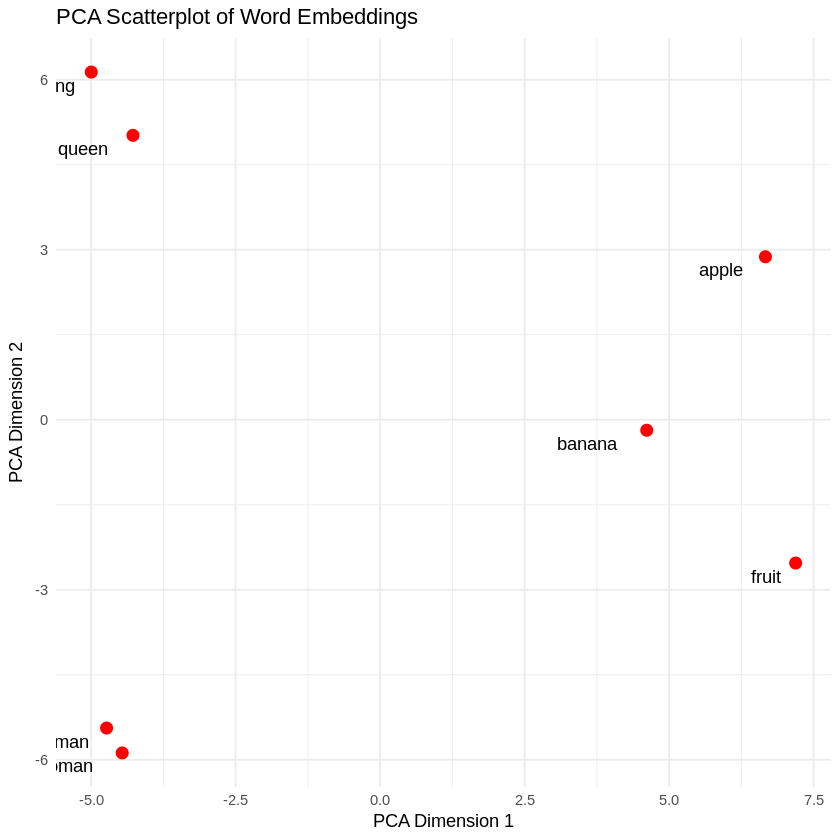

In [ ]:

# Function to display PCA scatterplot of word vectors
display_pca_scatterplot <- function(embeddings, words = NULL, sample = 0) {
  # If no words are specified, randomly sample words from the embeddings
  if (is.null(words)) {
    if (sample > 0) {
      words <- sample(rownames(embeddings), sample)
    } else {
      words <- rownames(embeddings)
    }
  }

  # Ensure all specified words are in the embeddings
  words <- intersect(words, rownames(embeddings))
  if (length(words) == 0) {
    stop("No words found in the embedding matrix!")
  }

  # Extract the word vectors for the specified words
  word_vectors <- embeddings[words, , drop = FALSE]

  # Perform PCA to reduce dimensions to 2D
  pca_result <- prcomp(word_vectors, center = TRUE, scale. = TRUE)
  twodim <- pca_result$x[, 1:2]

  # Create a data frame for visualization
  plot_data <- data.frame(
    x = twodim[, 1],
    y = twodim[, 2],
    word = words
  )

  # Plot the scatterplot with ggplot2
  ggplot(plot_data, aes(x = x, y = y, label = word)) +
    geom_point(color = "red", size = 3) +
    geom_text(vjust = 1.5, hjust = 1.5) +
    theme_minimal() +
    labs(title = "PCA Scatterplot of Word Embeddings",
         x = "PCA Dimension 1",
         y = "PCA Dimension 2")
}

# Example usage with your embedding matrix (replace `glove_matrix` with your actual data)
# Specify some words to plot or leave it NULL for all/sampled words
example_words <- c("king", "queen", "man", "woman", "apple", "banana", "fruit")
display_pca_scatterplot(glove_matrix, words = example_words)


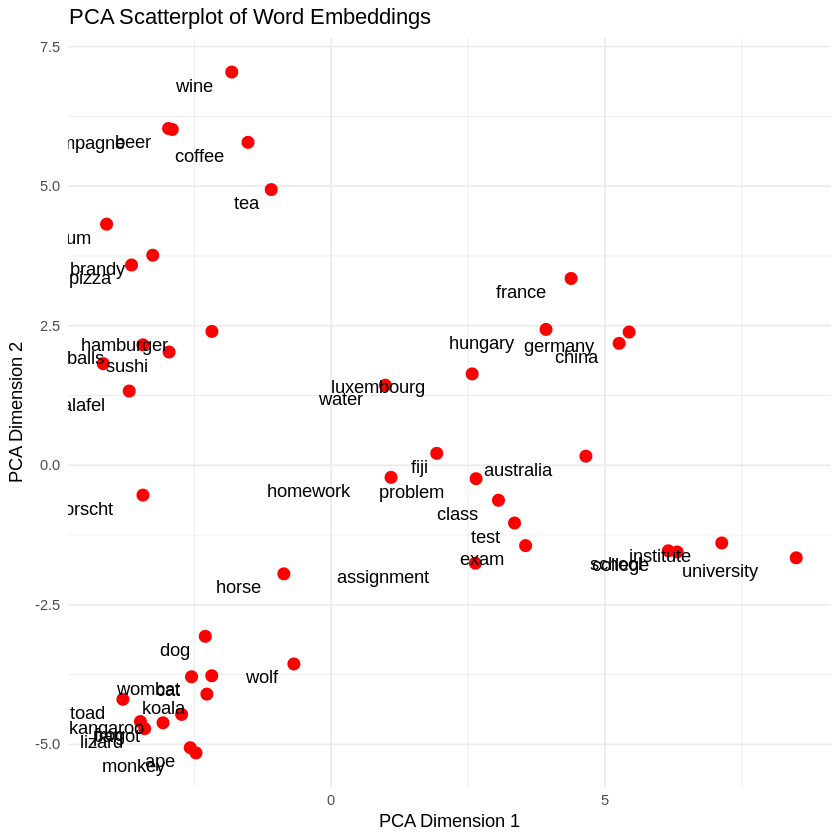

In [ ]:
example_words = c('coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute')

display_pca_scatterplot(glove_matrix, words = example_words)

In [ ]:
find_most_similar("nuclear", glove_matrix, top_n = 10)

,Word,Similarity
,<chr>,<dbl>
atomic,atomic,0.8345615
weapons,weapons,0.7992492
missile,missile,0.7333794
reactor,reactor,0.7278471
iran,iran,0.7257775
enrichment,enrichment,0.7181844
proliferation,proliferation,0.7147133
uranium,uranium,0.7099132
reactors,reactors,0.7078332


## Vectors trained on millions of PubMed abstracts

Interested in pre-trained word embeddings for biomedical and clinical documents:

https://github.com/ncbi-nlp/BioSentVec

In [ ]:
# Increase the timeout limit
options(timeout = 300)  # Set timeout to 5 minutes

# Download the file
w2c_bin_file <- "https://proteininformationresource.org/miscellaneous/student/PubMed-w2v.bin"
local_bin_file <- tempfile(fileext = ".bin")

tryCatch({
  download.file(w2c_bin_file, destfile = local_bin_file, mode = "wb")
  cat("Download successful!\n")
}, error = function(e) {
  cat("Download failed. Please check your connection or try manual download.\n")
  stop(e)
})



Download successful!


In [ ]:
install.packages("devtools")
devtools::install_github("bmschmidt/wordVectors")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp7z1j5L/remotes3d9123f77d7/bmschmidt-wordVectors-ad127c1/DESCRIPTION’ ... OK
* preparing ‘wordVectors’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘wordVectors_2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(wordVectors)

# Load the binary model
pubmed_wv <- read.vectors(local_bin_file)

# Access vector for a word
obama_vector <- pubmed_wv["obama"]
print(obama_vector)


Filename ends with .bin, so reading in binary format

Reading a word2vec binary file of 2351706 rows and 200 columns



  |======================================================================| 100%
A VectorSpaceModel object of  1  words and  200  vectors
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]   NA   NA   NA   NA   NA   NA
attr(,".cache")
<environment: 0x5a1aa393e528>


In [ ]:

# Check the vector size (dimensionality)
vector_size <- ncol(pubmed_wv)
print(vector_size)

[1] 200


In [ ]:
# Access vector for a word
cancer_vector <- pubmed_wv["cancer"]
print(cancer_vector)

A VectorSpaceModel object of  1  words and  200  vectors
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]   NA   NA   NA   NA   NA   NA
attr(,".cache")
<environment: 0x5a1ac5fcdf40>


In [ ]:
str(pubmed_wv)


Formal class 'VectorSpaceModel' [package "wordVectors"] with 2 slots
  ..@ .Data : num [1:2351706, 1:200] 0.001701 0.004831 0.092866 0.000758 -0.013166 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2351706] "</s>" "." "of" "the" ...
  .. .. ..$ : NULL
  ..@ .cache:<environment: 0x5a1ac23ef390> 
  ..$ dim     : int [1:2] 2351706 200
  ..$ dimnames:List of 2
  .. ..$ : chr [1:2351706] "</s>" "." "of" "the" ...
  .. ..$ : NULL


In [ ]:
# Check if "cancer" exists in the vocabulary
if ("cancer" %in% rownames(pubmed_wv@.Data)) {
  # Retrieve the vector for the word "cancer"
  cancer_vector <- pubmed_wv@.Data["cancer", ]

  # Print the vector
  print(cancer_vector)
} else {
  cat("Word 'cancer' not found in the vocabulary.\n")
}

  [1] -0.221769586  0.341267854 -0.528211772 -0.085358620 -0.358325034
  [6] -0.353420824 -0.286176354 -0.170157298  0.243153557  0.040523257
 [11]  0.298324227  0.047386538  0.141818762  0.142139688  0.091830842
 [16] -0.120046690 -0.499560446  0.019695204  0.244153485  0.156105027
 [21]  0.223408774  0.176641583  0.409777433 -0.102860801  0.020515295
 [26] -0.184424058  0.400364369  0.004834302 -0.082921527  0.148892626
 [31] -0.497980982  0.283007115 -0.194501862  0.159429193  0.261449128
 [36]  0.247531220 -0.120708458  0.258703858  0.235686749 -0.164805084
 [41] -0.012900268 -0.031935383  0.177104652  0.138336509 -0.343910664
 [46]  0.056840751 -0.146935299 -0.216690317 -0.055285681 -0.292114705
 [51] -0.105524972 -0.091180809  0.047594391 -0.201832026  0.226016298
 [56] -0.040447753  0.017502902  0.281405509  0.094782829  0.068104737
 [61]  0.115994915  0.241318181  0.098506622  0.107023351  0.237437710
 [66]  0.006437890 -0.038603418 -0.243467242  0.092108414  0.448627234
 [71] 

In [ ]:
model = pubmed_wv@.Data

In [ ]:
find_most_similar("nuclear", model, top_n = 10)

,Word,Similarity
,<chr>,<dbl>
Nuclear,Nuclear,0.8141359
CRM-1-mediated,CRM-1-mediated,0.6835216
factor-E2,factor-E2,0.6823976
factor-kappaB1,factor-kappaB1,0.6800702
transportin-dependent,transportin-dependent,0.6790010
non-nuclear,non-nuclear,0.6702870
factor-(kappa)B,factor-(kappa)B,0.6654256
CRM-1-dependent,CRM-1-dependent,0.6646667
nucleoplasmic,nucleoplasmic,0.6644253


In [ ]:
result <- word_analogy(
  positive_words = c("nuclear"),
  negative_words = NULL,
  embeddings = model,
  top_n = 10
)

print(result)

                                       Word Similarity
Nuclear                             Nuclear  0.8141359
CRM-1-mediated               CRM-1-mediated  0.6835216
factor-E2                         factor-E2  0.6823976
factor-kappaB1               factor-kappaB1  0.6800702
transportin-dependent transportin-dependent  0.6790010
non-nuclear                     non-nuclear  0.6702870
factor-(kappa)B             factor-(kappa)B  0.6654256
CRM-1-dependent             CRM-1-dependent  0.6646667
nucleoplasmic                 nucleoplasmic  0.6644253
envelope/endoplasmic   envelope/endoplasmic  0.6548577


In [ ]:
result <- word_analogy(
  positive_words = c("Nuclear"),
  negative_words = NULL,
  embeddings = model,
  top_n = 10
)

print(result)

                                                 Word Similarity
nuclear                                       nuclear  0.8141359
-nuclear                                     -nuclear  0.6280406
Cadmium-113                               Cadmium-113  0.6122800
Factor-kappaB                           Factor-kappaB  0.5939036
(sup13)C                                     (sup13)C  0.5834121
Fluorine-19                               Fluorine-19  0.5741490
factor-erythroid-2-related factor-erythroid-2-related  0.5697155
Factor-kappa                             Factor-kappa  0.5682513
factor-kappaBeta                     factor-kappaBeta  0.5667452
runon                                           runon  0.5602379


In [ ]:
result <- word_analogy(
  positive_words = c("cancer"),
  negative_words = NULL,
  embeddings = model,
  top_n = 10
)

print(result)

                                   Word Similarity
cancers                         cancers  0.8273032
caner                             caner  0.7624798
BCa                                 BCa  0.7224229
PCa                                 PCa  0.7091118
can-cer                         can-cer  0.7075604
CRC                                 CRC  0.7060143
BRCA1/2-associated   BRCA1/2-associated  0.7047150
breast-cancer             breast-cancer  0.7009023
adenocarcinoma           adenocarcinoma  0.6939370
castrate-refractory castrate-refractory  0.6888856


In [ ]:
result <- word_analogy(
  positive_words = c("CD19+"),
  negative_words = NULL,
  embeddings = model,
  top_n = 10
)

print(result)

           Word Similarity
CD20+     CD20+  0.9026835
CD38+     CD38+  0.8998805
CD5+       CD5+  0.8862646
HLA-DR+ HLA-DR+  0.8825798
CD2+       CD2+  0.8808907
CD21+     CD21+  0.8722431
CD23+     CD23+  0.8706404
CD3+       CD3+  0.8636169
CD19(+) CD19(+)  0.8604584
CD5-       CD5-  0.8590682


In [ ]:
result <- word_analogy(
  positive_words = c("apoptosis"),
  negative_words = NULL,
  embeddings = model,
  top_n = 10
)

print(result)

                                                 Word Similarity
apoptotic                                   apoptotic  0.7831602
Fas-triggered                           Fas-triggered  0.7798080
caspase-3-dependent               caspase-3-dependent  0.7775821
staurosporine-mediated         staurosporine-mediated  0.7771020
apotosis                                     apotosis  0.7765617
2-methoxyestradiol-induced 2-methoxyestradiol-induced  0.7758632
caspase-3-independent           caspase-3-independent  0.7693706
death-receptor-mediated       death-receptor-mediated  0.7688193
NCTD-induced                             NCTD-induced  0.7680205
apoptosis/necrosis                 apoptosis/necrosis  0.7644253


In [ ]:
result <- word_analogy(
  positive_words = c("methylation"),
  negative_words = NULL,
  embeddings = model,
  top_n = 10
)

print(result)

                                   Word Similarity
Methylation                 Methylation  0.8316795
hypomethylation         hypomethylation  0.8111790
hypermethylation       hypermethylation  0.7958726
methylations               methylations  0.7453095
demethylation             demethylation  0.7362308
GTF2A1L                         GTF2A1L  0.7296731
H3K79                             H3K79  0.7276177
methylated                   methylated  0.7239834
promoter-associated promoter-associated  0.7215446
H3-Lys9                         H3-Lys9  0.7200179


In [ ]:
result <- word_analogy(
  positive_words = NULL,
  negative_words = c("cancer"),
  embeddings = model,
  top_n = 10
)

print(result)

                                             Word Similarity
Microtubes                             Microtubes  0.2938268
pMEL34                                     pMEL34  0.2723343
smallest-sized                     smallest-sized  0.2718349
Cd-HA                                       Cd-HA  0.2705435
CaMV-encoded                         CaMV-encoded  0.2695602
NetPS                                       NetPS  0.2692642
normoxia-normocapnia         normoxia-normocapnia  0.2675583
methyl-alpha-galactoside methyl-alpha-galactoside  0.2671953
[(3)H]DFP                               [(3)H]DFP  0.2664641
250-325                                   250-325  0.2660053


In [ ]:
analogy <- function(x1, x2, y1) {
  result <- word_analogy(
    positive_words = c(y1, x2),
    negative_words = c(x1),
    embeddings = model,
    top_n = 10
  )
  return(result)
}

In [ ]:
analogy('flu', 'nausea', 'fever')

,Word,Similarity
,<chr>,<dbl>
vomiting,vomiting,0.7588423
nausea/vomiting,nausea/vomiting,0.7398577
chills,chills,0.7299168
myalgias,myalgias,0.7245108
asthenia,asthenia,0.7233165
pyrexia,pyrexia,0.7156744
retching,retching,0.7125534
giddiness,giddiness,0.7115327
lethargy,lethargy,0.7092775


In [ ]:
analogy('CD19+', 'B-Cell', 'Monocyte')

,Word,Similarity
,<chr>,<dbl>
protein-1,protein-1,0.5563706
Protein-1,Protein-1,0.5141430
monocyte,monocyte,0.4972654
/CCL2,/CCL2,0.4879676
protein-1-induced,protein-1-induced,0.4791099
CCL2/monocyte,CCL2/monocyte,0.4671196
Macrophage,Macrophage,0.4491788
attractant/activation,attractant/activation,0.4452220
JE/monocyte,JE/monocyte,0.4378429


In [ ]:
analogy('apoptosis', 'cellular', 'cancer')

,Word,Similarity
,<chr>,<dbl>
cancers,cancers,0.5943708
operable,operable,0.4853773
cancer(CRC),cancer(CRC),0.4816992
early-stage,early-stage,0.4816388
CRC,CRC,0.4748490
advanced/recurrent,advanced/recurrent,0.4678740
cancer.,cancer.,0.4669968
nsclc,nsclc,0.4595876
locally,locally,0.4576100


Done!

**Check out:**

https://projector.tensorflow.org/